<a href="https://colab.research.google.com/github/Holylight5/CV_Sesi5/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYEK ANALISIS DATA: BIKE SHARING**


*   Nama: Dirga marin Ramadhan
*   Email: dirgamarin2@gmail.com
*   ID dicoding: Dirga Marin Ramadhan





# Menentukan pertanyaan bisnis


*   Apakah bulan dengan banyak hari libur memiliki lebih banyak penggunaan sepeda?
*   Pengguna sepeda lebih terpengaruh oleh suhu atau kecepatan angin?
*   Diantara keduanya mana yang paling banyak menggunakan sepeda, pengguna terdaftar atau tidak terdaftar?
*   Di musim apa sepeda paling banyak di rental?


## Import library

In [23]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# DATA WRANGLING

# Gathering Data

In [24]:
# Mengambil data dari google drive
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 77.0MB/s]


In [25]:
#Mengekstrak file zip
content = 'Bike-sharing-dataset.zip'
zip = zipfile.ZipFile(content, 'r')
zip.extractall('data/')
zip.close()

# Load Data

In [26]:
#Load data hour menjadi tabel
dfh = pd.read_csv("data/hour.csv")
dfh

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [27]:
#Load data day menjadi tabel
dfd = pd.read_csv("data/day.csv")
dfd

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Data Assesing

In [28]:
#Mencari missing value
missing_values = dfh.isnull().sum()
missing_values

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [29]:
missing_values = dfd.isnull().sum()
missing_values

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [30]:
#Mencari data duplikat
duplicate_rows = dfh.duplicated().sum()
duplicate_rows

0

In [31]:
duplicate_rows = dfd.duplicated().sum()
duplicate_rows

0

In [32]:
#Menampilkan statistik deskriptif data file hour
dfh.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [33]:
#Menampilkan statistik deskriptif data file day
dfd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Data Cleaning


In [34]:
# Merubah nama kolom
dfh.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime',
                    'hr':'Hour'
                    }, inplace=True)

# Merubah huruf awal kolom menjadi kapital
dfh.columns = dfh.columns.str.title()


dfh

,Instant,Datetime,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [35]:
# Merubah nama kolom
dfd.rename(columns={'yr':'year',
                    'mnth':'month',
                    'hum':'humidity',
                    'cnt':'count',
                    'dteday':'Datetime'
                    }, inplace=True)

# Merubah huruf awal kolom menjadi kapital
dfd.columns = dfd.columns.str.title()

# Mengubah kolom datetime menjadi indeks
dfd['Datetime'] = pd.to_datetime(dfd['Datetime'])
dfd.set_index('Datetime', inplace=True)

dfd

,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
Datetime,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


# EDA

In [36]:
#Apakah bulan dengan banyak hari libur memiliki lebih banyak penggunaan sepeda?
dfd.groupby(by=["Year", "Month"]).agg({
    "Holiday": "sum",
    "Workingday": "sum",
    "Count": "sum"
})

Holiday  Workingday   Count
Year Month                             
0    1            1          20   38189
     2            1          19   48215
     3            0          23   64045
     4            1          20   94870
     5            1          21  135821
     6            0          22  143512
     7            1          20  141341
     8            0          23  136691
     9            1          21  127418
     10           1          20  123511
     11           2          20  102167
     12           1          21   87323
1    1            2          20   96744
     2            1          20  103137
     3            0          22  164875
     4            1          20  174224
     5            1          22  195865
     6            0          21  202830
     7            1          21  203607
     8            0          23  214503
     9            1          19  218573
     10           1          22  198841
     11           2          20  152664
     12           1          20  123713

In [37]:
#Apakah pengguna sepeda lebih terpengaruh oleh suhu atau kecepatan angin?
correlation_weather = dfd[['Temp', 'Windspeed', 'Count']].corr()

correlation_weather['Count'].sort_values(ascending=True)

,Count
Windspeed,-0.234545
Temp,0.627494
Count,1.000000


In [38]:
#Diantara keduanya mana yang paling banyak menggunakan sepeda, pengguna terdaftar atau tidak terdaftar?
dfd.groupby(by="Year").agg({"Registered": "sum","Casual": "sum"})

,Registered,Casual
Year,,
0,995851,247252
1,1676811,372765


Musim


*   1 : Spring
*   2 : Summer

*   3 : Fall
*   4 : Winter




In [39]:
#Di musim apa sepeda paling banyak di rental?
dfd.groupby('Season').Count.sum().sort_values(ascending=False)

,Count
Season,
3,1061129
2,918589
4,841613
1,471348


## Visualization & Explanatory Analysis

No 1
Apakah bulan dengan banyak hari libur memiliki lebih banyak penggunaan seped

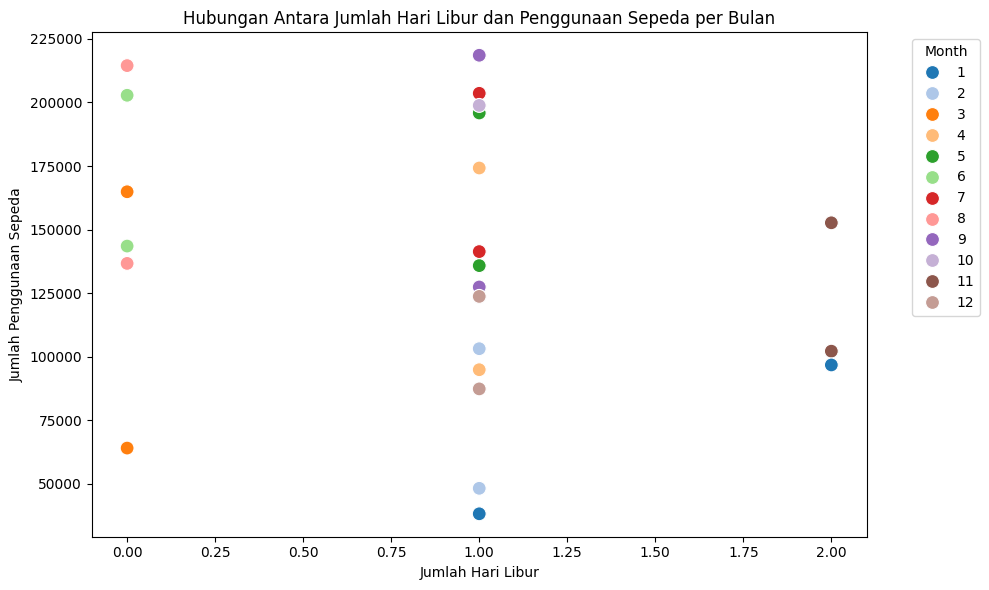

In [40]:
#Apakah bulan dengan banyak hari libur memiliki lebih banyak penggunaan sepeda
grouped_data = dfd.groupby(by=["Year", "Month"]).agg({
    "Holiday": "sum",
    "Workingday": "sum",
    "Count": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Holiday', y='Count', data=grouped_data, hue='Month', palette='tab20', s=100)

# Menambahkan judul dan label
plt.title('Hubungan Antara Jumlah Hari Libur dan Penggunaan Sepeda per Bulan')
plt.xlabel('Jumlah Hari Libur')
plt.ylabel('Jumlah Penggunaan Sepeda')

# Menampilkan legenda untuk bulan
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

Dilihat dari hasil visualisasi data diatas, banyaknya hari libur tidak menentukan banyaknya pengguna sepeda pada bulan tersebut.

No 2 Apakah pengguna sepeda lebih terpengaruh oleh suhu atau kecepatan angin?

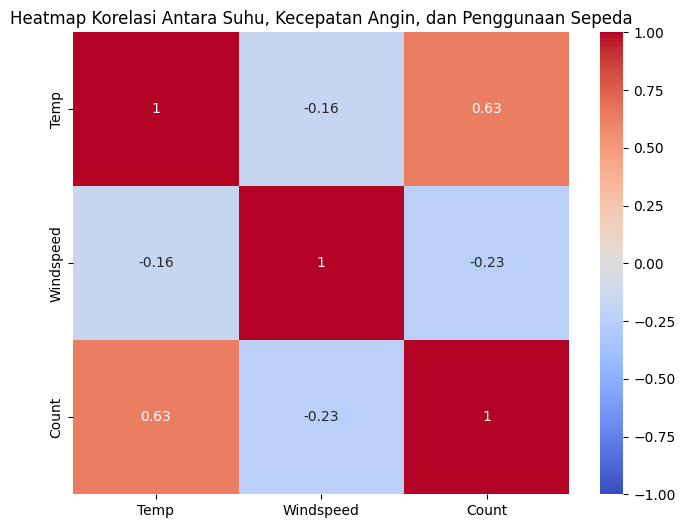

In [41]:
#Apakah pengguna sepeda lebih terpengaruh oleh suhu atau kecepatan angin?
correlation_weather = dfd[['Temp', 'Windspeed', 'Count']].corr()

# Membuat heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_weather, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antara Suhu, Kecepatan Angin, dan Penggunaan Sepeda')
plt.show()

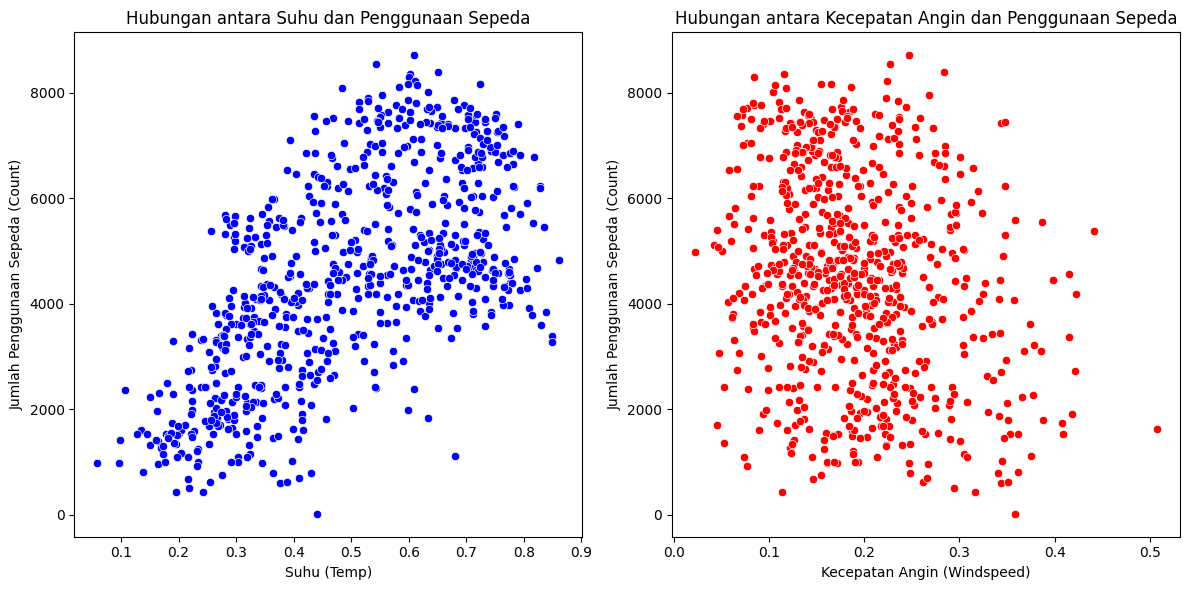

In [42]:
# Membuat figure dan axis untuk plot
plt.figure(figsize=(12, 6))

# Scatter plot untuk suhu vs penggunaan sepeda
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
sns.scatterplot(x='Temp', y='Count', data=dfd, color='blue')
plt.title('Hubungan antara Suhu dan Penggunaan Sepeda')
plt.xlabel('Suhu (Temp)')
plt.ylabel('Jumlah Penggunaan Sepeda (Count)')

# Scatter plot untuk kecepatan angin vs penggunaan sepeda
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
sns.scatterplot(x='Windspeed', y='Count', data=dfd, color='red')
plt.title('Hubungan antara Kecepatan Angin dan Penggunaan Sepeda')
plt.xlabel('Kecepatan Angin (Windspeed)')
plt.ylabel('Jumlah Penggunaan Sepeda (Count)')

# Menambahkan layout yang lebih rapat
plt.tight_layout()

# Menampilkan plot
plt.show()

Bedasarkan diagram diatas dapat disimpulkan bahwa suhu dan kecepatan angin berpengaruh pada banyaknya pengguna sepeda. Pada bagian suhu semakin nilai suhunya kecil maka pengguna sepeda sedikit. Sementara pada kecepatan angin pengguna sepeda tidak terlalu berpengaruh besar dengan banyaknya pengguna sepeda.

No 3 Diantara keduanya mana yang paling banyak menggunakan sepeda, pengguna terdaftar atau tidak terdaftar?

<ipython-input-43-cfb01164d6a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User Type', y='Total', data=total_data, palette='viridis')


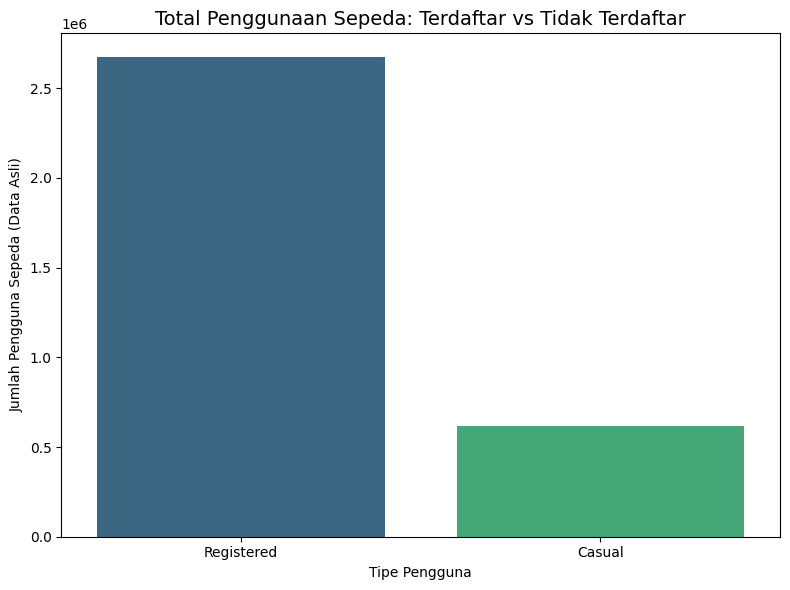

In [43]:
# Menjumlahkan total pengguna terdaftar dan tidak terdaftar di seluruh dataset
total_data = dfd[['Registered', 'Casual']].sum().reset_index()
total_data.columns = ['User Type', 'Total']

# Membuat plot
plt.figure(figsize=(8, 6))

# Membuat bar plot untuk menampilkan total pengguna terdaftar dan tidak terdaftar
sns.barplot(x='User Type', y='Total', data=total_data, palette='viridis')

# Menambahkan judul dan label
plt.title('Total Penggunaan Sepeda: Terdaftar vs Tidak Terdaftar', fontsize=14)
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Pengguna Sepeda (Data Asli)')

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari data diatas dapat disimpulkan bahwa pengguna paling banyak didapatkan oleh pengguna yang terdaftar dengan total pengguna lebih dari 2,5jt.

No 4 Di musim apa sepeda paling banyak di rental?

<ipython-input-44-fbf7560f90c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals['Count'], palette='viridis')


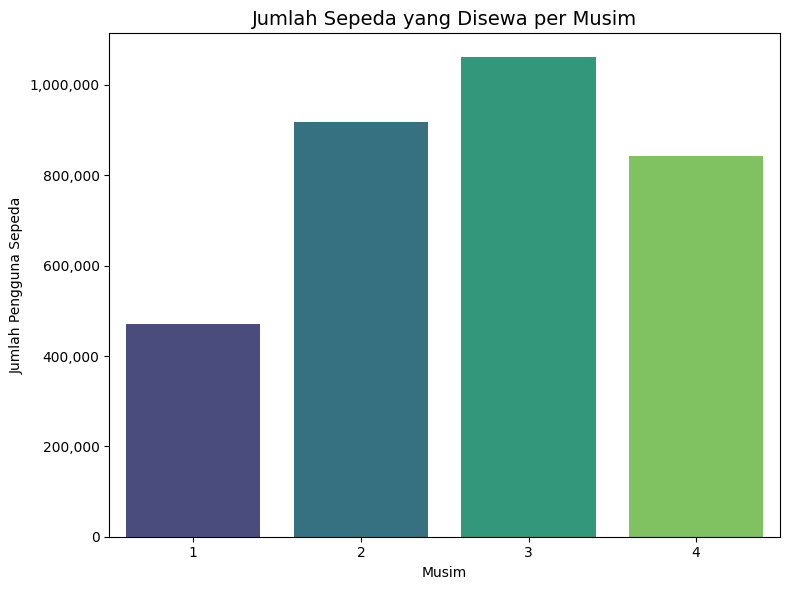

In [44]:
# Mengelompokkan data berdasarkan musim dan menghitung total pengguna
seasonal_rentals = dfd.groupby('Season').agg({'Count': 'sum'}).sort_values('Count', ascending=False)

# Membuat visualisasi bar plot untuk perbandingan jumlah sepeda yang disewa per musim
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals['Count'], palette='viridis')

# Menambahkan judul dan label
plt.title('Jumlah Sepeda yang Disewa per Musim', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')

# Mengatur format sumbu y agar menampilkan angka ribuan
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari data diatas menunjukan bahwa pengguna sepeda paling banyak pada musim gugur, bisa jadi karena cuaca di musim gugur yang sejuk dengan pemandangan gugurnya daun pohon yang membuat kesan romantis.